In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


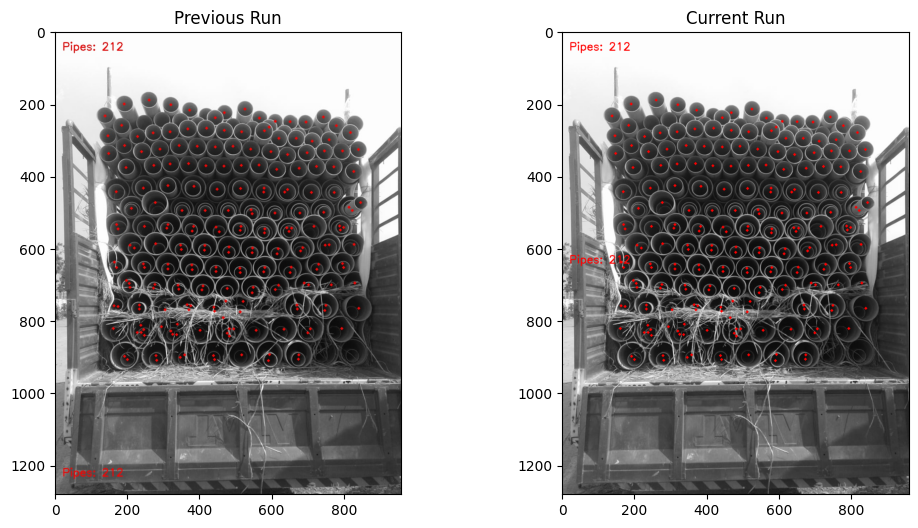

True

In [28]:
def detect_circles(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    #resizing image
    height, width = image.shape
    
    target_width = 960
    target_height = 1280
    
    aspect_ratio = width / height
    
    if aspect_ratio >= 1:
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(target_height * aspect_ratio)
    
    top_border = (target_height - new_height) // 2
    bottom_border = target_height - new_height - top_border
    
    left_border = (target_width - new_width) // 2
    right_border = target_width - new_width - left_border
    
    resized_image = cv2.copyMakeBorder(
        image, top_border, bottom_border, left_border, right_border, cv2.BORDER_CONSTANT, value=[0, 0, 0]
    )

    # 3. Hough Circle Transform
    circles = cv2.HoughCircles(resized_image, cv2.HOUGH_GRADIENT, dp=1.1, minDist=10,
                               param1=300, param2=40, minRadius=10, maxRadius=40)

    output = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2BGR)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0,:]:
            center = (circle[0], circle[1])  # center
            radius = circle[2]  # radius
            # cv2.circle(output, center, radius, (0, 255, 0), 2)
            cv2.circle(output, center, 2, (0, 0, 255), 3)  # Draw center
    # Count the number of detected circles
    num_circles = len(circles[0]) if circles is not None else 0

    # Draw the count on the image
    count_text = f"Pipes: {num_circles}"
    cv2.putText(output, count_text, (20, target_height - (target_height//2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(output, count_text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    return output

result = detect_circles("sample.jpg")

previous_img = cv2.imread("previous.jpg")

# Display the images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(previous_img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Previous Run")
ax[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax[1].set_title("Current Run")
plt.show()

# Save the current result as previous.jpg for future runs
cv2.imwrite("previous.jpg", result)
